<a href="https://colab.research.google.com/github/tanglan7857/-/blob/master/3_2classingNewswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters 
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [0]:
train_data[10]   #每个样本都是一个整数列表（表示单词索引） 

#将数据向量化
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))   
    for i, sequence in enumerate(sequences): 
        results[i, sequence] = 1.
    return results 
  
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)  

In [0]:
#将标签向量化(one_hot编码)
def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i,labels in enumerate(labels):
        results[i,labels] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)
  

In [0]:
#将标签向量化(将标签转换为整数张量)
y_train = np.array(train_labels) 
y_test = np.array(test_labels)

#损失函数的选择也要改变
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [9]:
#模型定义
from keras import models 
from keras import layers  
model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#编译模型
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
#在训练数据中留出1000个样本作为验证集
x_val = x_train[:1000] 
partial_x_train = x_train[1000:]  
y_val = one_hot_train_labels[:1000] 
partial_y_train = one_hot_train_labels[1000:]

In [16]:
#训练模型
history = model.fit(partial_x_train,partial_y_train, epochs=20,batch_size=512,validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 177us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 149us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 150us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 152us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 155us/step - loss: 0.4581 - a

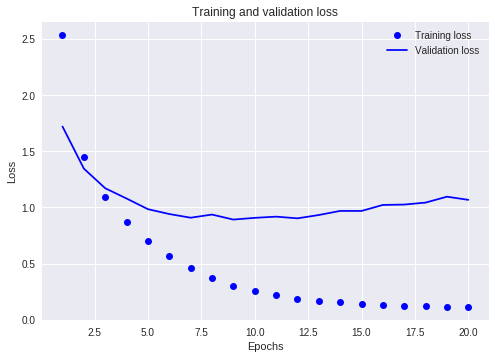

In [17]:
#绘制训练损失和验证损失
import matplotlib.pyplot as plt  
loss = history.history['loss'] 
val_loss = history.history['val_loss']  
epochs = range(1, len(loss) + 1)  
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend()  
plt.show()

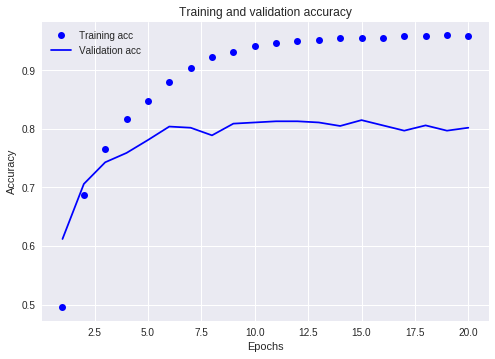

In [20]:
#绘制训练精度和验证精度
plt.clf()    
acc = history.history['acc'] 
val_acc = history.history['val_acc']  
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend()  
plt.show()

In [21]:
#从头开始训练一个模型
#在第九轮开始出现过拟合
model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))  
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy']) 
model.fit(partial_x_train, partial_y_train,epochs=9, batch_size=512,validation_data=(x_val, y_val)) 
results = model.evaluate(x_test, one_hot_test_labels)

results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 176us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 152us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 153us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 152us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 154us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 154us/step - loss: 0.5124 - acc: 0.8923 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 152us/step - loss: 0.4123 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

[1.022207990036622, 0.7756010686194165]

In [23]:
predictions = model.predict(x_test)
predictions[0].shape
np.sum(predictions[0])

1.0